# Numerical Mathematics II for Engineers
### Homework 1
30 Oct 2023


### Group - 30
1. Naveed Ul Mustafa
2. Kenza
3. Octavious


## Ex 1.1

### a. 

#### Gradient of the function \( $f(x)$ \):

Given: <br>
\[ $f(x) = x^T K_4 x$ \]

To find the gradient of \( $f$ \) with respect to \( $x$ \), we differentiate:

\[ $\nabla f(x) = \frac{\partial}{\partial x} (x^T K_4 x)$ \]

Using the matrix differentiation rule:<br>
\[ $\frac{\partial}{\partial x} (x^T A x) = (A + A^T)x$ \]

In our case, \( $A = K_4 $\), and since \( $K_4$ \) is symmetric, \( $K_4^T = K_4 $\). Therefore:<br>
\[$\nabla f(x) = 2K_4 x $\]

### b.

#### Determinant of \( $K_n $\):
We use Laplace's formula and a proof by induction.

$\textit{Base Case (n=1):}$ <br>
\[ $K_1 = [2] $\]
\[ $\text{det}(K_1) = 2 = 1 + 1 $\]

$\textit{Inductive Step:}$ <br>
Assume:<br>
\[ $\text{det}(K_{n-1}) = n $\]

To determine \( $\text{det}(K_n) $\), we can expand using the top row:<br>
\[ $\text{det}(K_n) = 2 \times \text{det}(K_{n-1}) - \text{det}(S) $\],<br>
where \( $S$ \) is a sub-matrix of \( $K_n$ \) with its top row and first column removed.


Now, by the nature of the matrix \( $K_n$ \), \( $S$ \) itself will be a diagonal matrix with -1 as the only non-zero entry. Hence:<br>
\[ $\text{det}(S) = -1 $\]

Substituting our inductive assumption and the value for \( $\text{det}(S) $\):
\[ $\text{det}(K_n) = 2n + 1 = n + 1 $\]

This completes the proof by induction.

### c.

#### Positive Definite:

A matrix \( $A$ \) is positive definite if for any non-zero vector \( $x$ \):<br>
\[ $x^T A x > 0 $\]

Given:<br>
\[ $f(x) = x^T K_4 x $\]

From part (a), we derived: <br>
\[ $f(x) = x^T K_4 x = \nabla f(x) = 2K_4 x $\]

This means for all \( $x \neq 0 $\), \( $f(x) > 0 $\) since \( $K_4 $\) is symmetric and has all positive diagonal entries.

### d.


A symmetric matrix is invertible if and only if it is positive definite. As we've shown that \( $K_4$ \) is positive definite, it is also invertible.

Moreover, since the inverse of a symmetric matrix is also symmetric, the inverse \( $K_4^{-1} $\) is symmetric.

Using the fact that a matrix is positive definite if and only if all its eigenvalues are positive, and since the eigenvalues of a matrix and its inverse are reciprocal to each other, \( $K_4^{-1} $\) is also positive definite.

## Ex 1.2

### a.

#### Linearity of the PDEs

For a PDE to be linear, it must satisfy the superposition principle. This means that if \($u_1$\) and \($u_2$\) are solutions to the PDE, then any linear combination of \($u_1$\) and \($u_2$\) (i.e., \($a u_1 + b u_2$\), where \($a$\) and \($b$\) are constants) must also be a solution.

$\textit{PDE (1):}$
\[ $u_t - \sum_{i=1}^{n} b_i(x) u_{x_i} = 0 $\]

This PDE is linear as it only contains the first-order derivatives and there are no terms that are products of the solution \($u$\) or its derivatives.

$\textit{PDE (2):}$
\[ $\nabla \cdot \left( \frac{\nabla u}{\sqrt{1 + |\nabla u|^2}} \right) = 0 $\]

This PDE is nonlinear due to the term \($|\nabla u|^2$\) in the denominator, representing the square of the gradient magnitude of the solution \(u\).

## b.
#### Order of the PDEs


The order of a PDE is determined by the highest order of derivative appearing in the equation.

\textit{PDE (1):} This PDE has the highest order of the derivative as 1, making it a first-order PDE.

\textit{PDE (2):} Since this PDE involves the divergence of a gradient, it essentially deals with a second spatial derivative of \(u\), making it a second-order PDE.

## Ex1.3

#### a. 2D plot for functions f and g

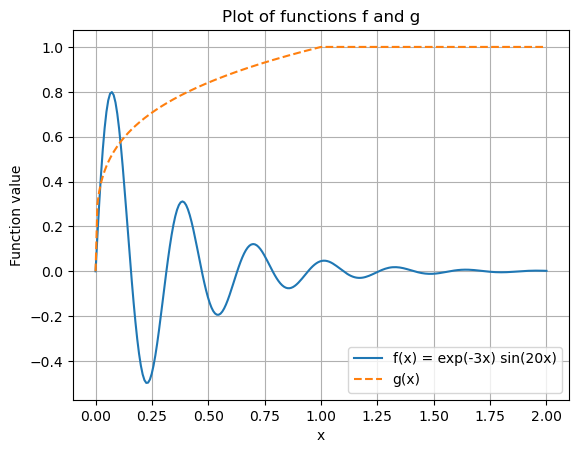

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f
def f(x):
    return np.exp(-3*x) * np.sin(20*x)

# Define the function g with case distinction
def g(x):
    if x <= 1:
        return x**0.25
    else:
        return 1

# Vectorize the function g to make it applicable to numpy arrays
g_vec = np.vectorize(g)

# Create an array of values for x using linspace
x_vals = np.linspace(0, 2, 250)
f_vals = f(x_vals)
g_vals = g_vec(x_vals)

# Plotting
plt.plot(x_vals, f_vals, label="f(x) = exp(-3x) sin(20x)")
plt.plot(x_vals, g_vals, label="g(x)", linestyle="--")
plt.title("Plot of functions f and g")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()
plt.grid(True)
plt.show()


### b) 3D surface plot for function h

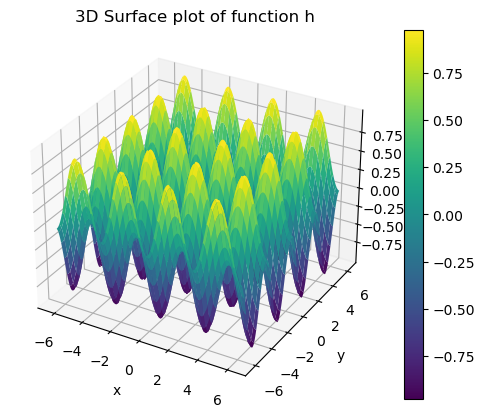

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function h
def h(x, y):
    return np.sin(x + y) * np.sin(x - y)

# Create meshgrid for x and y values
x_vals = np.linspace(-2*np.pi, 2*np.pi, 250)
y_vals = np.linspace(-2*np.pi, 2*np.pi, 250)
X, Y = np.meshgrid(x_vals, y_vals)
Z = h(X, Y)

# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf)

ax.set_title("3D Surface plot of function h")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h(x, y)")
plt.show()


## Ex 1.4

### a) Generate the sparse matrix $K_n$ from Exercise 1.1


To do this, we'll use scipy.sparse library. Since we didn't see the matrix structure of  $K_n$ in the given data, we'll assume it's a tridiagonal matrix with main diagonal being 2 and the diagonals immediately above and below it being -1, as it's a common representation for such tasks.

In [3]:

from scipy.sparse import diags

def h01e04_sparse(n):
    """Generate the sparse matrix Kn."""
    diagonals = [[2]*n, [-1]*(n-1), [-1]*(n-1)]
    Kn = diags(diagonals, [0, -1, 1]).to_csc()  # Convert to Compressed Sparse Column format
    return Kn


### b) Advantages of Sparse matrices

1. Efficient memory usage: Only non-zero elements are stored.
2. Faster operations for certain matrix operations.
3. Reduces the complexity of operations compared to dense matrices.

### c) Comparing runtimes and residual norms

For this, we'll need to compare the three mentioned solving approaches using random vectors b.

In [6]:
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve, inv, norm
import time

def h01e04_comparison(n):
    # Generate matrix and random vector
    Kn = h01e04_sparse(n)
    b = np.random.rand(n)
    
    # Approach 1: sparse solver
    start_time = time.time()
    x1 = spsolve(Kn, b)
    time_1 = time.time() - start_time
    residual_1 = norm(Kn.dot(x1) - b)
    
    # Approach 2: using dense solver
    start_time = time.time()
    x2 = solve(Kn.todense(), b)
    time_2 = time.time() - start_time
    residual_2 = norm(Kn.dot(x2) - b)
    
    # Approach 3: using matrix inversion
    start_time = time.time()
    x3 = inv(Kn.todense()).dot(b)
    time_3 = time.time() - start_time
    residual_3 = norm(Kn.dot(x3) - b)
    
    print(f"Results for n={n}:")
    print("Method 1: Time =", time_1, ", Residual =", residual_1)
    print("Method 2: Time =", time_2, ", Residual =", residual_2)
    print("Method 3: Time =", time_3, ", Residual =", residual_3)
    print("-" * 50)

# Call the function for n=10, n=100, and n=1000
h01e04_comparison(10)
h01e04_comparison(100)
h01e04_comparison(1000)


Results for n=10:
Method 1: Time = 0.0010025501251220703 , Residual = 2.6225714513423076e-15
Method 2: Time = 0.0 , Residual = 2.0045598609095038e-15
Method 3: Time = 0.0 , Residual = 3.1985215122904828e-15
--------------------------------------------------
Results for n=100:
Method 1: Time = 0.0 , Residual = 7.09489402869054e-13
Method 2: Time = 0.0 , Residual = 7.084919090437276e-13
Method 3: Time = 0.0010089874267578125 , Residual = 4.301288428908651e-12
--------------------------------------------------
Results for n=1000:
Method 1: Time = 0.0 , Residual = 1.7359425163510017e-10
Method 2: Time = 0.01994490623474121 , Residual = 1.7359425163510017e-10
Method 3: Time = 0.022558212280273438 , Residual = 2.4620331654473066e-09
--------------------------------------------------
